# Midterm: 5000 Movie Dataset
### Dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata/data 

In [804]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from wordcloud import *
import string
import re
from nltk.corpus import stopwords
from wordcloud import *
import psycopg2
import networkx as nx
from wordcloud import *
import string
import re
import textblob
import plotly as py
py.offline.init_notebook_mode()
from textblob import TextBlob

In [628]:
movieData = pd.read_csv('tmdb_5000_movies.csv')
movieData.head()

budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]                                           
2  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]                                             
3  [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]                 
4  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]                                  

                                       homepage      id  \
0  http://www.avatarmovie.com/                   19995    
1  http://disney.go.com/disneypictures/pirates/  285      
2  http://www.sonypictures.com/movies/spectre/   206647   
3  http://www.thedarkknightrises.com/            49026    
4  http://movies.disney.com/john-carter          49529    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]                               
1  [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]                                                                                                                                                                                
2  [{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}, {"id": 156095, "name": "british secret service"}, {"id": 158431, "name": "united kingdom"}]                                                                                                                                       

## What are the 10 most popular movies in the Animation and Family genre?

In [629]:
animation_family = movieData[movieData['genres'] == '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]']
result = animation_family.sort_values('popularity', ascending=False)

In [630]:
result = action_adventure_fantasy.sort_values(['vote_average'],ascending=False)
result.head(n=10)

id                  title  \
57    10681  WALLÂ·E                 
328   12     Finding Nemo            
1471  12429  å´ã®ä¸ã®ããã§   
6     38757  Tangled                 
874   9444   Anastasia               
722   14836  Coraline                
430   11544  Lilo & Stitch           
614   20352  Despicable Me           
34    62211  Monsters University     
1108  10895  Pinocchio               

                                                                  genres  \
57    [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
328   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
1471  [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
6     [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
874   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
722   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
430   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
614   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
34    [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   
1108  [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             keywords  \
57    [{"id": 9799, "name": "romantic comedy"}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
328   [{"id": 494, "name": "father son relationship"}, {"id": 10026, "name": "harbor"}, {"id": 14785, "name": "underwater"}, {"id": 33759, "name": "fish tank"}, {"id": 33760, "name": "great barrier reef"}, {"id": 156948, "name": "missing child"}, {"id": 179430, "name": "aftercreditsstinger"}, {"id": 179431, "name": "duringcreditsstinger"}, {"id": 180557, "name": "short term memory loss"}, {"id": 180568, "name": "clownfish"}, {"id": 180574, "name": "father son reunion"}, {"id": 181068, "name": "protective father"}]                                                                                                                                                                                                                                                                 
1471  [{"id": 456, "name": "mother"}, {"id": 1357, "name": "fish"}, {"id": 1792, "name": "cliff"}, {"id": 5905, "name": "father"}, {"id": 5938, "name": "mermaid"}, {"id": 7376, "name": "princess"}, {"id": 210024, "name": "anime"}]                                                                                                                                                                                                

## What country has produced the most movies? Use networkx to visulize this.

#### Formatting the production_countries strings

In [631]:
ctrys = movieData["production_countries"].tolist()
movies = movieData["title"].tolist()

movies_by_ctry = {'country': [], 'movie': []}

movie_place = 0
for i in range(0, len(ctrys)):
    item = ctrys[i]
    new_item = item[1:-1]
    lst = new_item.split(', ')
    for i in range(1, len(lst), 2):
        full_name = lst[i]
        name = full_name[9:-2]
        movies_by_ctry['country'].append(name)
        movies_by_ctry['movie'].append(movies[movie_place])
    movie_place += 1

    
print(len(movies_by_ctry['country']))
print(len(movies_by_ctry['movie']))

6436
6436


In [737]:
ctry_movies = pd.DataFrame(movies_by_ctry, columns = ['country', 'movie'])
ctry_movies.head(n=5)

country                                     movie
0  United States of America  Avatar                                  
1  United Kingdom            Avatar                                  
2  United States of America  Pirates of the Caribbean: At World's End
3  United Kingdom            Spectre                                 
4  United States of America  Spectre

#### Graphing countries to movies

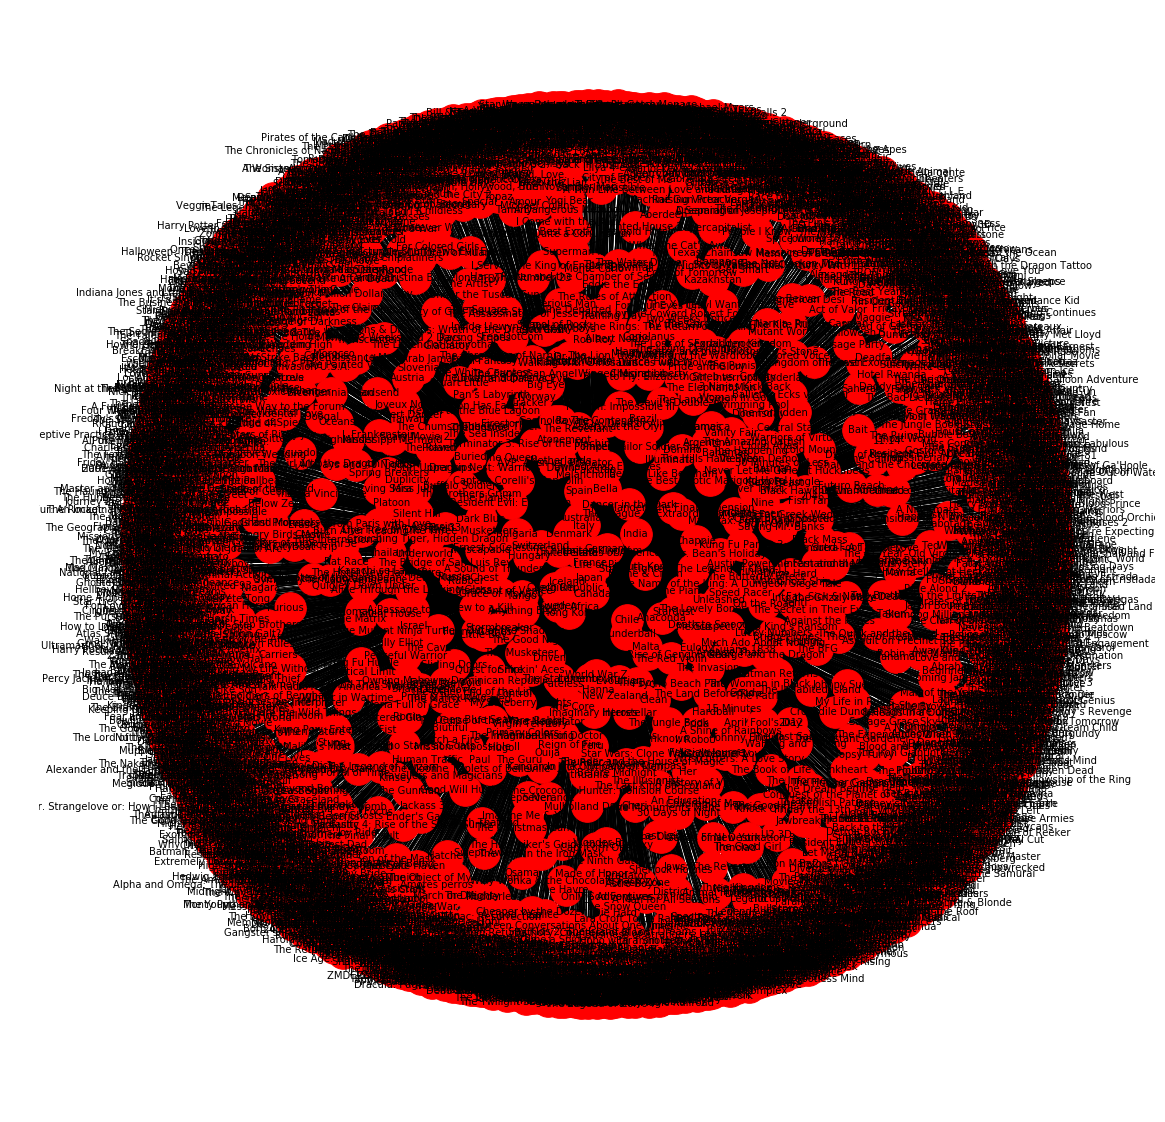

In [726]:
g = nx.Graph()

g.add_nodes_from(ctry_movies.country)

for index, row in ctry_movies.iterrows():
    g.add_edge(row['country'], row['movie'])

gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g,k=.3,scale=8.0,center=(0,0))
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=10)

plt.show()

#### Scaling it back...

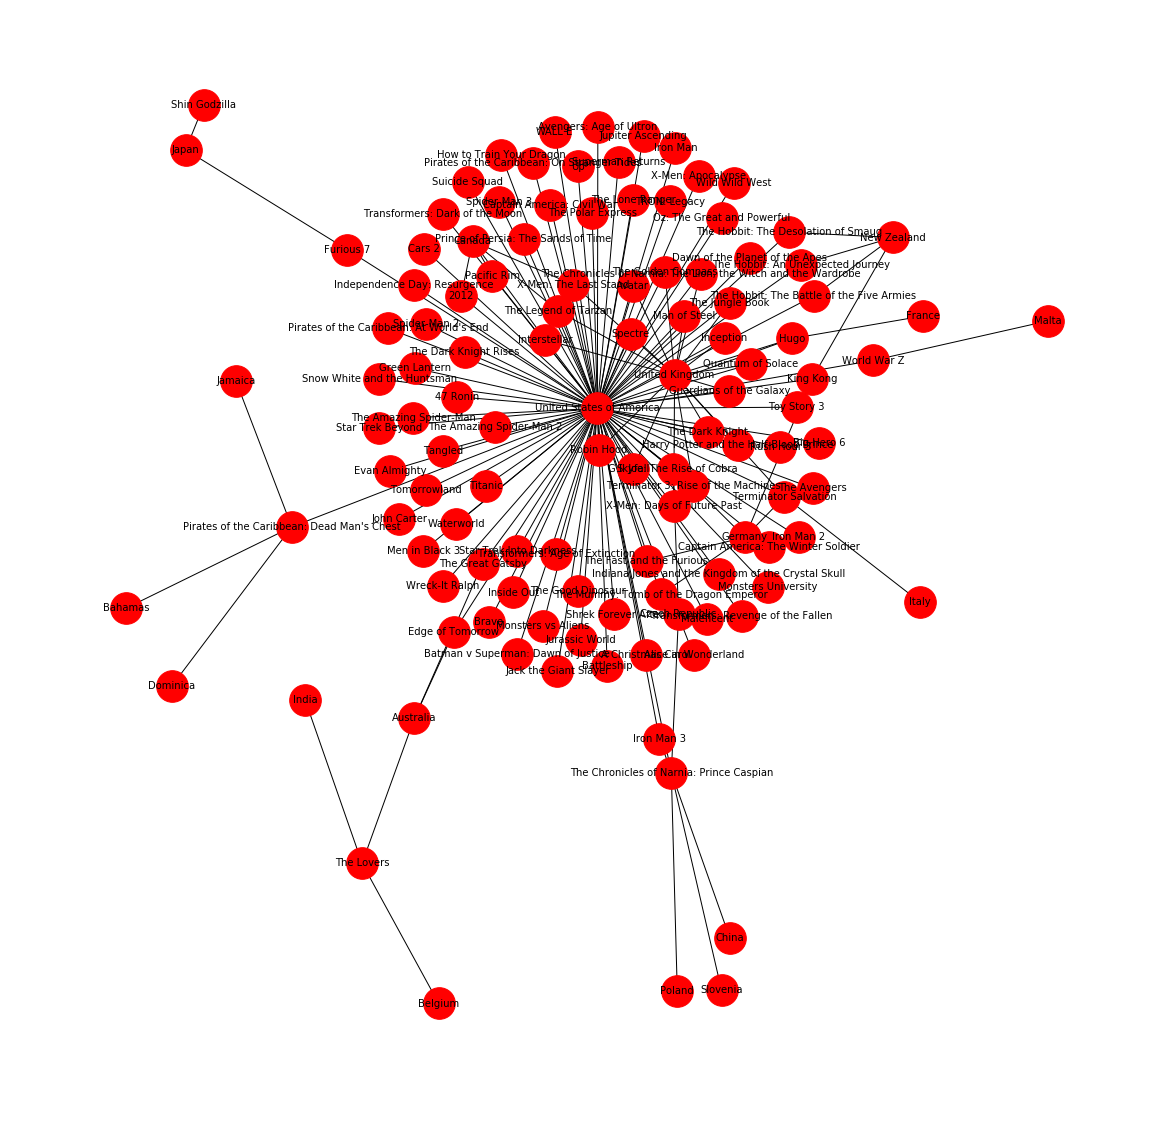

In [727]:
scaling_back = ctry_movies.head(n=150)

g = nx.Graph()

g.add_nodes_from(scaling_back.country)

for index, row in scaling_back.iterrows():
    g.add_edge(row['country'], row['movie'])

gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g,k=.3,scale=8.0,center=(0,0))
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=10)

plt.show()

#### Grouping by country and counting number of movies produced

In [779]:
count_ctry = ctry_movies.groupby('country', as_index=False).count()
count_ctry = count_ctry.sort_values('movie', ascending=False)
count_ctry = count_ctry.rename(columns={'movie': 'total'})
count_ctry.head()

country  total
87  United States of America  3956 
86  United Kingdom            636  
30  Germany                   324  
29  France                    306  
16  Canada                    261

In [780]:
ctry_codes = pd.read_csv('country_codes.csv', encoding = 'latin-1')
ctry_codes = ctry_codes.rename(columns={'name': 'country', 'alpha-3': 'code'})
ctry_codes.head()

country code
0  Afghanistan     AFG
1  ÌÉland Islands  ALA
2  Albania         ALB
3  Algeria         DZA
4  American Samoa  ASM

In [782]:
with_codes = ctry_codes.merge(count_ctry)
x = with_codes.sort_values('total', ascending=False)
x.head()

country code  total
81  United States of America  USA  3956 
80  United Kingdom            GBR  636  
30  Germany                   DEU  324  
29  France                    FRA  306  
16  Canada                    CAN  261

In [784]:
data = [ dict(
        type = 'choropleth',
       locations = with_codes.code,
       z = with_codes.total, # values for color code
       text = with_codes.country, # text value that shows when you hover over it
       autocolorscale = True,
       reversescale = False,
        ) 
       ]

layout = dict(
    title = 'Number of Movies Produced Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
url = py.offline.iplot(fig)

### Conclusion: The United States of America has produced the most movies (3956 movies)

## What is the average budget for a movie given it's rating? Do higher budget movies tend to have higher ratings?

In [785]:
rate_budget = movieData.groupby('vote_average', as_index=False)['budget'].mean()
rate_budget

vote_average        budget
0   0.0           1.294683e+05
1   0.5           0.000000e+00
2   1.0           0.000000e+00
3   1.9           0.000000e+00
4   2.0           8.333550e+04
5   2.2           0.000000e+00
6   2.3           3.250000e+07
7   2.4           0.000000e+00
8   2.6           0.000000e+00
9   2.7           0.000000e+00
10  2.8           7.500000e+05
11  2.9           2.340000e+07
12  3.0           1.094615e+07
13  3.1           6.375000e+06
14  3.2           8.714286e+06
15  3.3           4.730556e+06
16  3.4           5.500000e+06
17  3.5           8.670833e+06
18  3.6           2.686000e+07
19  3.7           1.711111e+07
20  3.8           1.110000e+07
21  3.9           1.716667e+07
22  4.0           1.561539e+07
23  4.1           1.895576e+07
24  4.2           2.189286e+07
25  4.3           1.686786e+07
26  4.4           2.269179e+07
27  4.5           1.381250e+07
28  4.6           1.489868e+07
29  4.7           2.161569e+07
..  ...                    ...
41  5.9           3.734413e+07
42  6.0           2.963056e+07
43  6.1           3.228502e+07
44  6.2           3.479462e+07
45  6.3           3.171359e+07
46  6.4           3.163433e+07
47  6.5           3.204780e+07
48  6.6           3.168518e+07
49  6.7           3.295340e+07
50  6.8           2.349888e+07
51  6.9           2.414301e+07
52  7.0           2.814617e+07
53  7.1           3.312212e+07
54  7.2           2.558549e+07
55  7.3           3.251311e+07
56  7.4           2.980027e+07
57  7.5           3.391291e+07
58  7.6           3.755227e+07
59  7.7           2.353845e+07
60  7.8           2.430485e+07
61  7.9           3.188525e+07
62  8.0           2.069697e+07
63  8.1           3.138333e+07
64  8.2           3.064380e+07
65  8.3           1.776429e+07
66  8.4           3.000000e+06
67  8.5           1.775000e+07
68  9.3           0.000000e+00
69  9.5           0.000000e+00
70  10.0          2.500000e-01

[71 rows x 2 columns]

Text(0.5,0,'Budget')

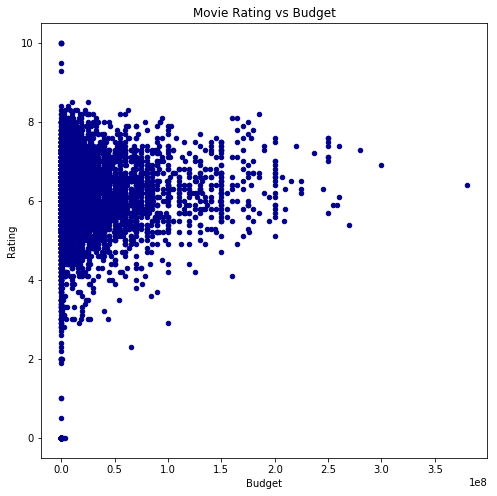

In [786]:
movieData.plot(figsize=(8,8), kind='scatter', x='budget', y='vote_average', color = 'DarkBlue')
plt.title('Movie Rating vs Budget')
plt.ylabel('Rating')
plt.xlabel('Budget')

### Conclusion: There appears to be no correlation between budget and movie rating
#### Follow up: Do revenue and popularity have a better correlation?
----> Conclusion: sort of, but not by much

Text(0.5,0,'Budget')

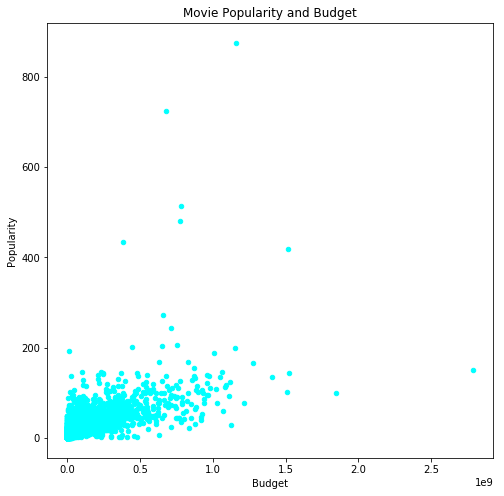

In [787]:
movieData.plot(figsize=(8,8), kind='scatter', x='revenue', y='popularity', color = 'cyan')
plt.title('Movie Popularity and Budget')
plt.ylabel('Popularity')
plt.xlabel('Budget')

In [796]:
df1 = movieData[['budget','popularity']]
correlation = df1.corr()
correlation

budget  popularity
budget      1.000000  0.505414  
popularity  0.505414  1.000000

## What is the distribution of vote_average (rating) and the count of movies with that rating?

#### Finding the integer of each vote_average number, creating a new column out of it

In [641]:
movieData['int_vote_avg'] = movieData.vote_average.map(lambda x : int(x))
movieData.head(n=1)

budget  \
0  237000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   

  original_language original_title  \
0  en                Avatar          

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

   popularity  \
0  150.437577   

                                                                                                                                                                                          production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]   

       ...      release_date     revenue  runtime  \
0      ...       2009-12-10   2787965087  162.0     

                                                                        spoken_languages  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]   

     status                      tagline   title vote_average  vote_count  \
0  Released  Enter the World of Pandora.  Avatar  7.2          11800        

   int_vote_avg  
0  7             

[1 rows x 21 columns]

#### Creating a dictionary of int_vote_avg and count

In [642]:
rating_count = {}

for vote in movieData.int_vote_avg:
    if vote not in rating_count:
        rating_count[vote] = 1
    else:
        rating_count[vote] += 1

In [643]:
rating_df = pd.DataFrame(columns = ['rating', 'count'])

rating_df['rating'] = rating_count.keys()
rating_df['count'] = rating_count.values()

rating_df

rating  count
0   0       64   
1   1       3    
2   2       21   
3   3       84   
4   4       356  
5   5       1303 
6   6       1984 
7   7       903  
8   8       79   
9   9       2    
10  10      4

#### (checking to make sure the new dataframe is correct using group by)

In [797]:
compare = movieData.groupby('int_vote_avg', as_index=False)['title'].count()
compare

int_vote_avg  title
0   0             64   
1   1             3    
2   2             21   
3   3             84   
4   4             356  
5   5             1303 
6   6             1984 
7   7             903  
8   8             79   
9   9             2    
10  10            4

#### just out of curiousity, what are the four movies with a rating of ten?

In [801]:
score_ten = movieData[movieData.int_vote_avg == 10]
score_ten

budget  \
3519  0        
4045  0        
4247  1        
4662  0        

                                                                                             genres  \
3519  [{"id": 35, "name": "Comedy"}]                                                                  
4045  [{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}]    
4247  [{"id": 10749, "name": "Romance"}, {"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]   
4662  [{"id": 35, "name": "Comedy"}]                                                                  

     homepage      id  \
3519  NaN      89861    
4045  NaN      78373    
4247  NaN      361505   
4662  NaN      40963    

                                                                                                             keywords  \
3519  [{"id": 131, "name": "italy"}, {"id": 8250, "name": "victorian england"}, {"id": 14712, "name": "young woman"}]   
4045  [{"id": 1415, "name": "small town"}, {"id": 1556, "name": "texas"}]                                               
4247  []                                                                                                                
4662  [{"id": 10183, "name": "independent film"}]                                                                       

     original_language         original_title  \
3519  en                Stiff Upper Lips        
4045  en                Dancer, Texas Pop. 81   
4247  en                Me You and Five Bucks   
4662  en                Little Big Top          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       overview  \
3519  Stiff Upper Lips is a broad parody of British period films, especially the lavish Merchant-Ivory productions of the 'eighties and early 'nineties. Although it specifically targets A Room with a View, Chariots of Fire, Maurice, A Passage to India, and many other films, in a more general way Stiff Upper Lips satirises popular perceptions of certain Edwardian traits: propriety, sexual repression, xenophobia, and class snobbery.                                                                                                                                                                                                                                                                                                                                                                                                                                                
4045  Four guys, best friends, have grown up together in DANCER, TEXAS POP. 81, a tiny town in West Texas. Years ago, they made a solemn vow to leave town together as soon as they graduate. Now, it's that weekend and the time has come to "put up or shut up." The clock is ticking and as all 81 people in the town watch, comment, offer advice and place bets, these four very different boys with unique backgrounds struggle with the biggest decision of their lives... whether to stay or leave home.                                                                                                                                                                                                         

Oddly enough, movies that were rated a 10 either have a budget of zero or have no production company listed. Looking at the mean vote_count, it looks like the vote_count for the four movies had exremely low vote_counts, which is probably how they achieved such a high rating. 

In [803]:
movieData.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03  4803.000000    4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07  57165.484281   21.492301    8.226064e+07  106.875859    
std    4.072239e+07  88694.614033   31.816650    1.628571e+08  22.611935     
min    0.000000e+00  5.000000       0.000000     0.000000e+00  0.000000      
25%    7.900000e+05  9014.500000    4.668070     0.000000e+00  94.000000     
50%    1.500000e+07  14629.000000   12.921594    1.917000e+07  103.000000    
75%    4.000000e+07  58610.500000   28.313505    9.291719e+07  118.000000    
max    3.800000e+08  459488.000000  875.581305   2.787965e+09  338.000000    

       vote_average    vote_count  int_vote_avg  
count  4803.000000   4803.000000   4803.000000   
mean   6.092172      690.217989    5.652925      
std    1.194612      1234.585891   1.200481      
min    0.000000      0.000000      0.000000      
25%    5.600000      54.000000     5.000000      
50%    6.200000      235.000000    6.000000      
75%    6.800000      737.000000    6.000000      
max    10.000000     13752.000000  10.000000

#### Creating a bar graph to better visulize the distribution of int_vote_average 

Text(0.5,0,'Rating')

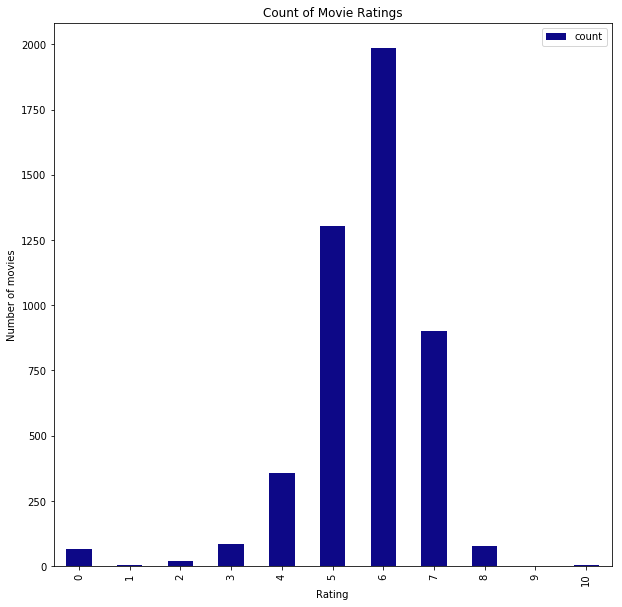

In [646]:
rating_count_bar_chart = rating_df.set_index(['rating'])

rating_count_bar_chart.plot.bar(figsize=(10,10), colormap ='plasma')

plt.title('Count of Movie Ratings')
plt.ylabel('Number of movies')
plt.xlabel('Rating')

### Conclusion: By looking at the bar graph, it looks like a movie rating between 6-7 (not including 7) is the most popular. 

## Find the most common genres

In [654]:
count_genres = movieData.groupby('genres').count()
count_genres = count_genres.reset_index()
count_genres = count_genres[count_genres.budget > 50]
count_genres = count_genres.rename(columns = {'budget':'count'})
result = count_genres.sort_values(['count'], ascending=False)
result = result[['genres', 'count']]
result

genres  \
543   [{"id": 18, "name": "Drama"}]                                                                   
944   [{"id": 35, "name": "Comedy"}]                                                                  
392   [{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                 
833   [{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                
899   [{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                     
876   [{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]   
578   [{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                  
1174  [{"id": 99, "name": "Documentary"}]                                                             
590   [{"id": 27, "name": "Horror"}]                                                                  
519   [{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]                                   

      count  
543   370    
944   282    
392   164    
833   144    
899   142    
876   109    
578   88     
1174  68     
590   64     
519   62

## Key words of the Horror, Thriller genre

In [648]:
sw = set(stopwords.words())

In [649]:
patt = re.compile(r'id|name|:|"')

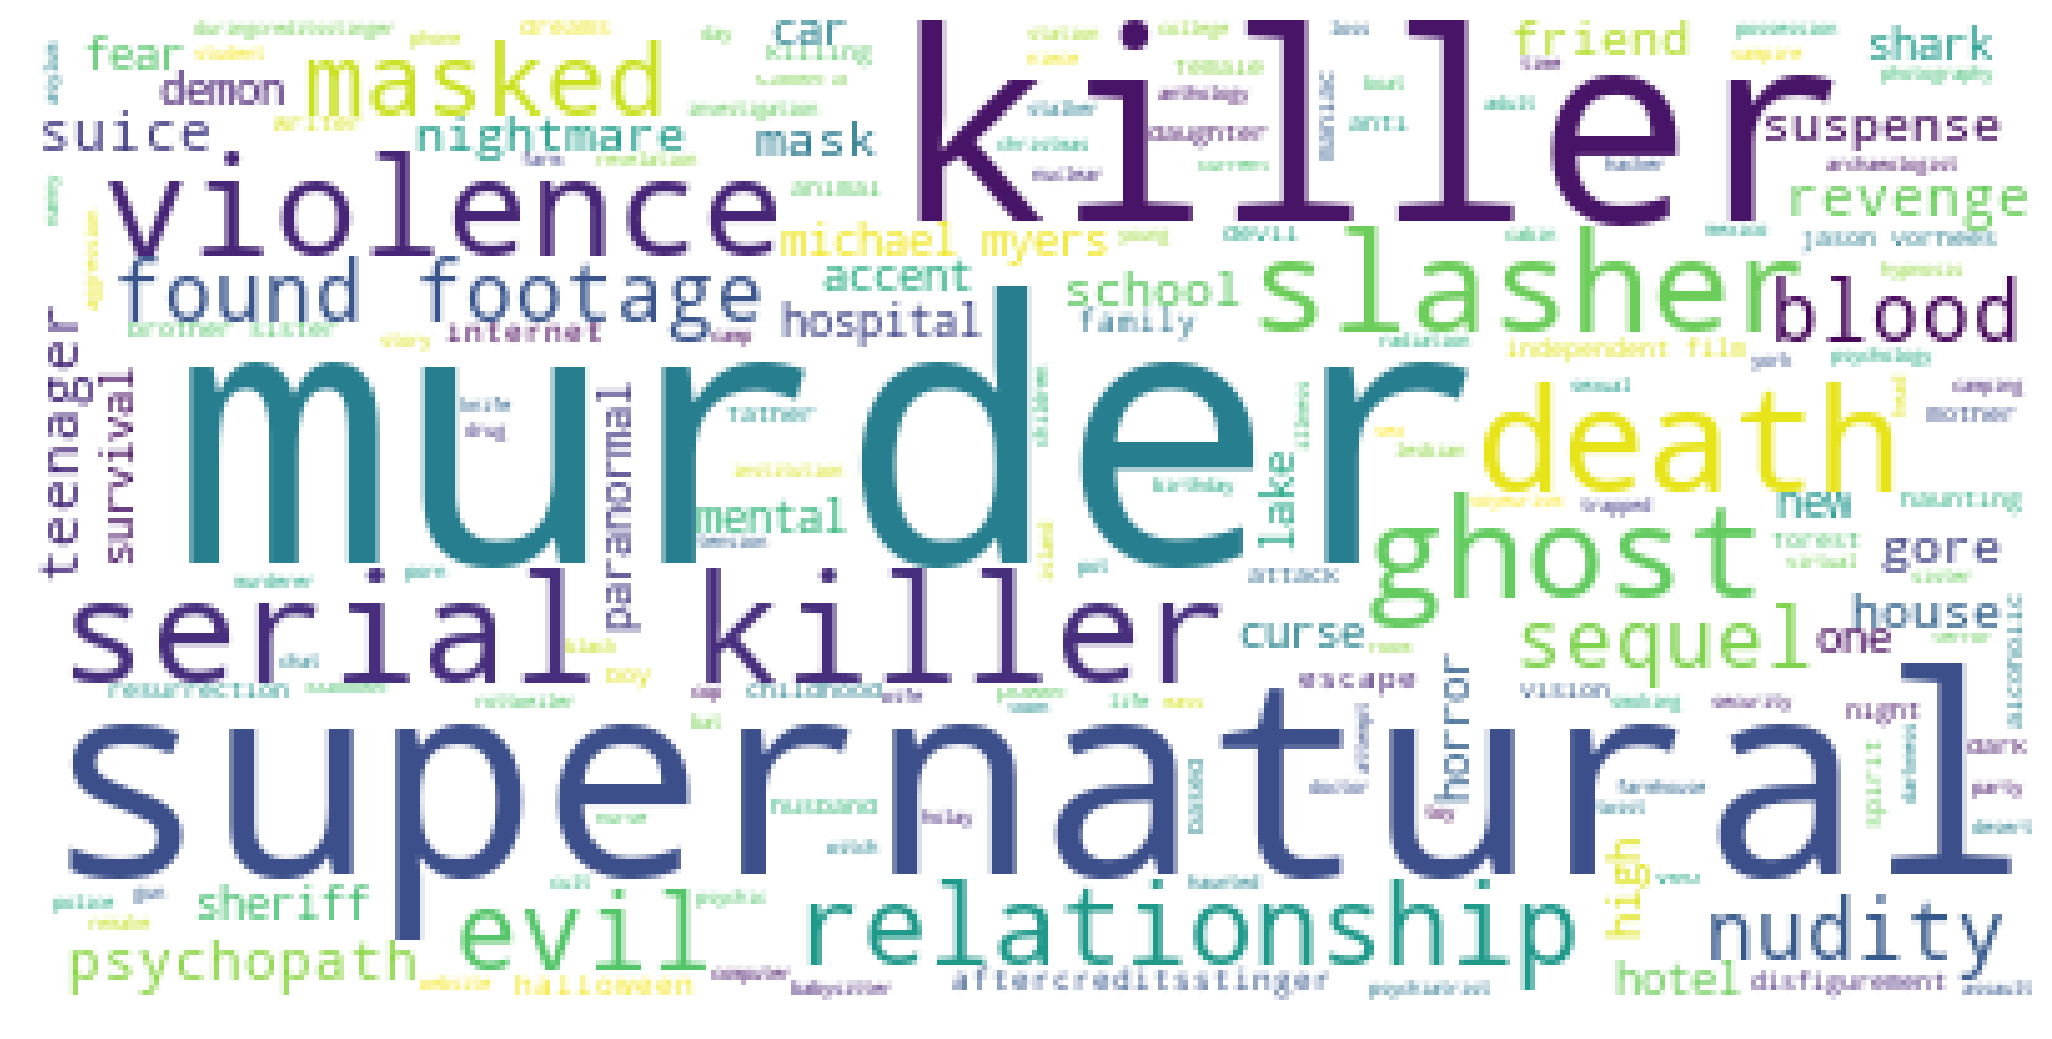

In [650]:
fig, ax = plt.subplots(figsize=(36, 20))
wc = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'', " ".join(movieData[movieData.genres== '[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'].keywords)))

ax.axis('off')
ax.imshow(wc)

#### just for comparison...the comdey genre

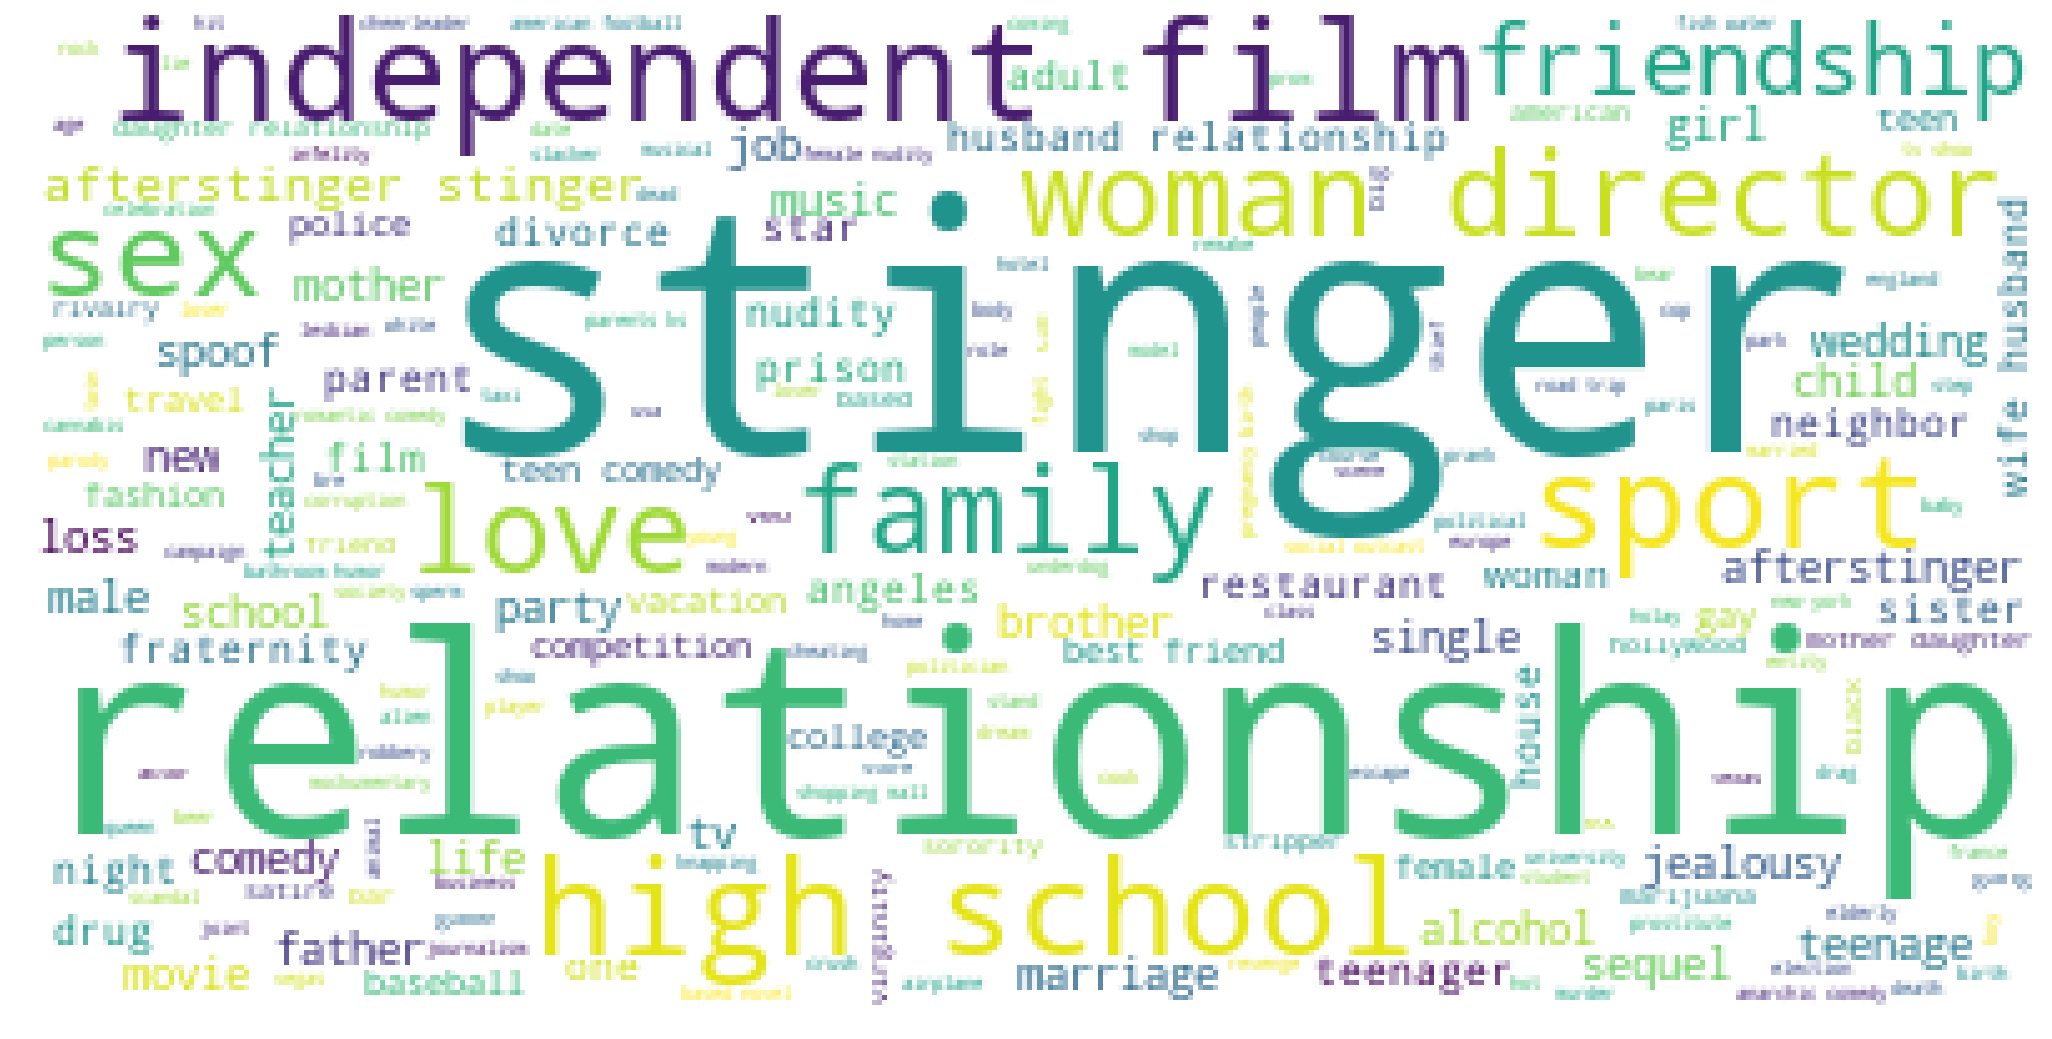

In [651]:
patt = re.compile(r'id|name|:|during|credits')

fig, ax = plt.subplots(figsize=(36, 20))
wc = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'', " ".join(movieData[movieData.genres== '[{"id": 35, "name": "Comedy"}]'].keywords)))

ax.axis('off')
ax.imshow(wc)

## Conduct a sentiment analysis on the overview of movies


### Do some genres tend to have more negative overviews?

In [854]:
def polarity(x):
    if isinstance(x, type(str)):
        text = TextBlob(x)
        return text.sentiment.polarity

movieData['polarity_score'] = movieData.overview.map(lambda x : polarity(x))

In [863]:
sentiment = movieData.groupby('genres', as_index=False)['polarity_score'].mean()
sentiment = sentiment.rename(columns={'polarity_score': 'avg_polarity_score'})
sentiment = sentiment.sort_values('avg_polarity_score', ascending=False)
sentiment

genres  \
407   [{"id": 18, "name": "Drama"}, {"id": 10769, "name": "Foreign"}, {"id": 36, "name": "History"}, {"id": 10752, "name": "War"}]                                                                               
1013  [{"id": 53, "name": "Thriller"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 28, "name": "Action"}]                                                                                   
125   [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 16, "name": "Animation"}, {"id": 28, "name": "Action"}, {"id": 10751, "name": "Family"}]                                           
949   [{"id": 36, "name": "History"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}, {"id": 10752, "name": "War"}]                                                                                 
335   [{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 35, "name": "Comedy"}]                                            
581   [{"id": 27, "name": "Horror"}, {"id": 878, "name": "Science Fiction"}, {"id": 28, "name": "Action"}]                                                                                                       
137   [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 53, "name": "Thriller"}]                                               
521   [{"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}, {"id": 10749, "name": "Romance"}]                                                                                                               
278   [{"id": 14, "name": "Fantasy"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}, {"id": 10749, "name": "Romance"}]                                                                             
731   [{"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10769, "name": "Foreign"}]                                                                                                             
1124  [{"id": 878, "name": "Science Fiction"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}, {"id": 10749, "name": "Romance"}]                                                                  
249   [{"id": 12, "name": "Adventure"}, {"id": 9648, "name": "Mystery"}, {"id": 53, "name": "Thriller"}]                                                                                                         
348   [{"id": 16, "name": "Animation"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]                                                                                                   
111   [{"id": 12, "name": "Adventure"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                          
727   [{"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 53, "name": "Thriller"}]                                     
966   [{"id": 37, "name": "Western"}, {"id": 36, "name": "History"}]                                                                                                                                             
127   [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 878, "name": "Science Fiction"}, {"id": 10751, "name": "Family"}]   
995   [{"id": 53, "name": "Thriller"}, {"id": 28, "name": "Action"}, {"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]                                                                                 
24    [{"id": 10749, "name": "Romance"}, {"id": 16, "name": "Animation"}, {"id": 12, "name": "Adventure"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}]         


### Count of how many genres have the same polarity score

In [873]:
genre_polarity_count = movieData.groupby('genres', as_index=False)['polarity_score'].count()
genre_polarity_count = genre_polarity_count.rename(columns={'polarity_score': 'count_polarity_scores'})
genre_polarity_count = genre_polarity_count.sort_values('count_polarity_scores', ascending=False)
genre_polarity_count.head(n=10)

genres  \
543   [{"id": 18, "name": "Drama"}]                                                                   
944   [{"id": 35, "name": "Comedy"}]                                                                  
392   [{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                 
833   [{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                
899   [{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                     
876   [{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]   
578   [{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                  
1174  [{"id": 99, "name": "Documentary"}]                                                             
590   [{"id": 27, "name": "Horror"}]                                                                  
519   [{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]                                   

      count_polarity_scores  
543   369                    
944   282                    
392   164                    
833   144                    
899   142                    
876   109                    
578   88                     
1174  66                     
590   64                     
519   62

In [921]:
polarity_score_count = movieData.groupby('polarity_score', as_index=False).count()
polarity_score_count = polarity_score_count[['polarity_score', 'budget']]
polarity_score_count = polarity_score_count.rename(columns={'budget': 'movie_count'})
polarity_score_count = polarity_score_count.sort_values('movie_count', ascending=False)
polarity_score_count.head(n=10)

polarity_score  movie_count
858   0.00            452        
1371  0.10            66         
1940  0.25            62         
433  -0.10            56         
2208  0.50            51         
1129  0.05            42         
156  -0.25            42         
224  -0.20            39         
599  -0.05            38         
2034  0.30            35

In [945]:
polarity_score_count = movieData.polarity_score

Text(0.5,1,'Frequency of Polarity Score for All Movies')

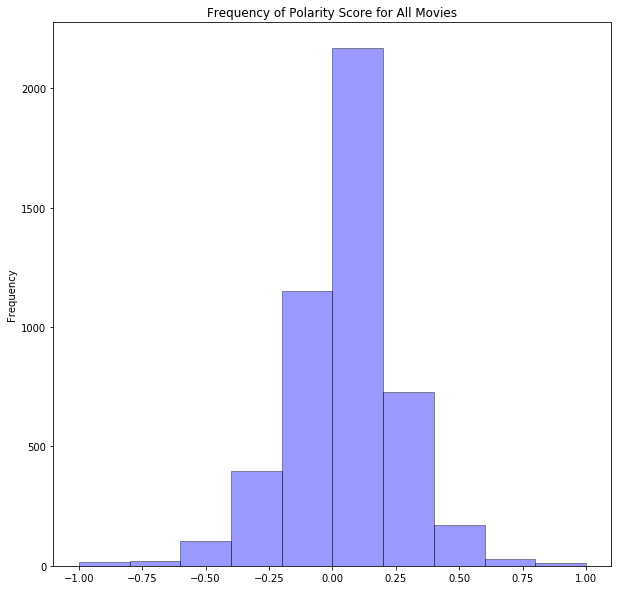

In [948]:
polarity_score_count.plot.hist(alpha=.4, ec='black', figsize=(10,10), color='blue').set_title('Frequency of Polarity Score for All Movies')

In [935]:
documentary_polarity = movieData[movieData.genres == '[{"id": 99, "name": "Documentary"}]']
documentary_polarity = documentary_polarity['polarity_score']

Text(0.5,1,'Frequency of Polarity Score for the Documentary Genre')

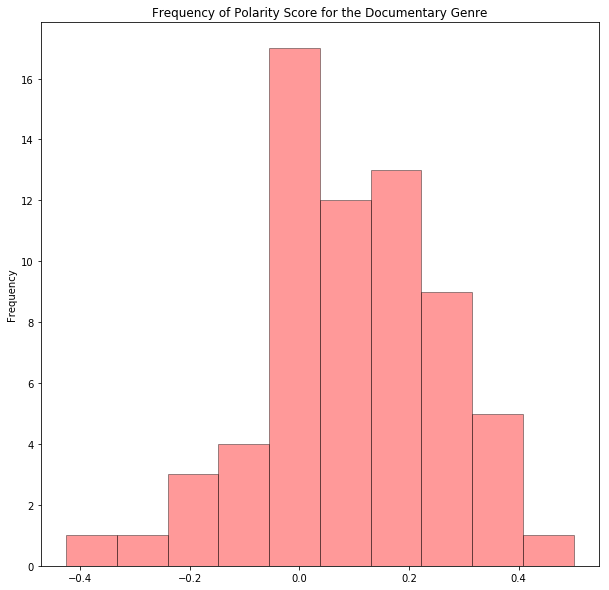

In [949]:
documentary_polarity.plot.hist(alpha=.4, ec='black', figsize=(10,10), color='red').set_title('Frequency of Polarity Score for the Documentary Genre')

This distribution is expected as the Documentary genre, on average, scored the highest polarity values